# 12ÏãúÍπåÏßÄ ÌîÑÎ°úÏ†ùÌä∏ ÏßÑÌñâ
# 12Ïãú~13Ïãú Ï†êÏã¨ÏãúÍ∞Ñ
# 13Ïãú~17Ïãú ÌîÑÎ°úÏ†ùÌä∏ ÏßÑÌñâ

---

# 1. Coefficient

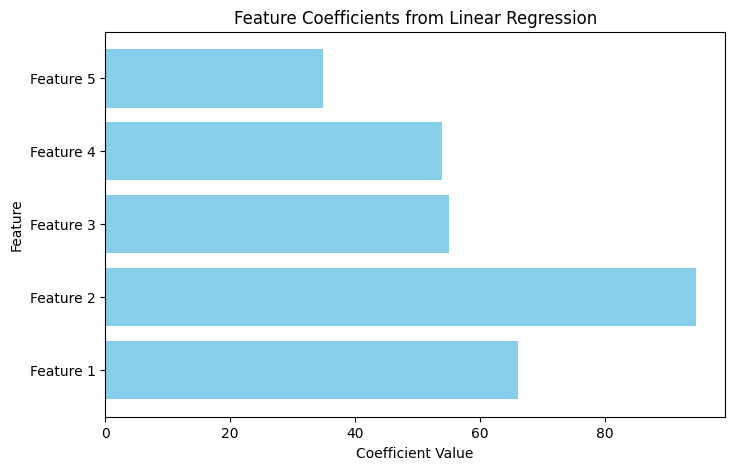

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†®
model = LinearRegression()
model.fit(X_scaled, y)

# ÌöåÍ∑Ä Í≥ÑÏàò Í∞ÄÏ†∏Ïò§Í∏∞
coefficients = model.coef_
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

# ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Coefficients from Linear Regression")
plt.show()

---

# 2. Feature Importance

Baseline Accuracy: 1.0000


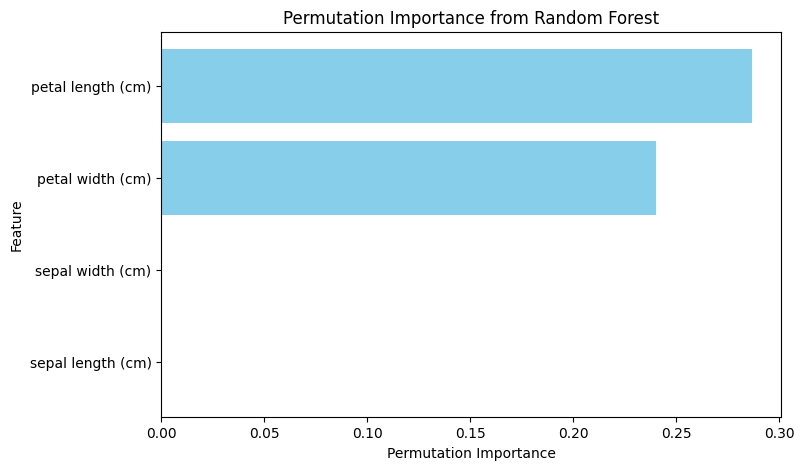

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î∂ÑÌï†
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ÏõêÎûò Î™®Îç∏ ÏÑ±Îä• ÌôïÏù∏
y_pred = model.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: {baseline_acc:.4f}")

# Permutation Importance Í≥ÑÏÇ∞
perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy', random_state=42)

# ÏãúÍ∞ÅÌôî
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(8, 5))
plt.barh(np.array(feature_names)[sorted_idx], perm_importance.importances_mean[sorted_idx], color='skyblue')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Permutation Importance from Random Forest")
plt.show()

---

# 3. LIME

### 3.1 Ï†ïÌòïÎç∞Ïù¥ÌÑ∞ LIME


In [ ]:
!pip install lime -q


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 275.7/275.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î∂ÑÌï†
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# LIME ÏÑ§Î™ÖÍ∏∞ ÏÉùÏÑ±
explainer = LimeTabularExplainer(X_train, feature_names=feature_names, class_names=data.target_names, discretize_continuous=True)

# ÌäπÏ†ï ÏÉòÌîå ÏÑ†ÌÉù
sample_idx = 5  # X_testÏóêÏÑú 5Î≤àÏß∏ ÏÉòÌîå ÏÑ†ÌÉù
exp = explainer.explain_instance(X_test[sample_idx], model.predict_proba, num_features=4)

# ÏÑ§Î™Ö Í≤∞Í≥º ÏãúÍ∞ÅÌôî
exp.show_in_notebook()

### 3.2 Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ LIME

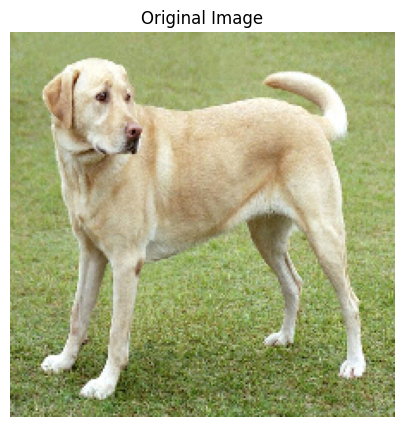

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 8s/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 145ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 191ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 142ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 110ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 83ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 75ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 83ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 78ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 81ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 76ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 84ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

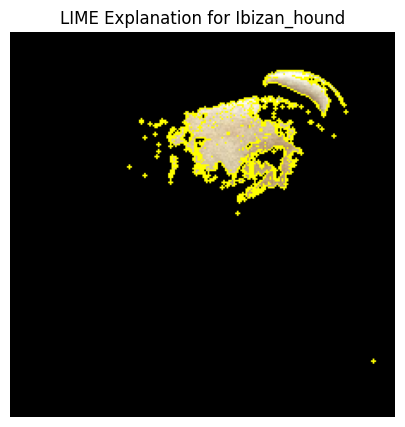

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries

# üìå ÏÇ¨Ï†Ñ ÌïôÏäµÎêú ResNet50 Î™®Îç∏ Î°úÎìú
model = ResNet50(weights='imagenet')

# üìå Ïò§ÌîàÎêú ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú (ImageNet ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïö©)
img_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"
img_path = tf.keras.utils.get_file("sample_image.jpg", img_url)

# üìå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # 224x224 ÌÅ¨Í∏∞Î°ú Î≥ÄÌôò
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä
    img_array = preprocess_input(img_array)  # ResNet50Ïóê ÎßûÍ≤å Ï†ïÍ∑úÌôî
    return img, img_array  # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ Ï†ÑÏ≤òÎ¶¨Îêú Ïù¥ÎØ∏ÏßÄ Î∞òÌôò

# üìå LIME ÏÑ§Î™ÖÍ∏∞ ÏÉùÏÑ±
explainer = lime_image.LimeImageExplainer()

# üìå ÏòàÏ∏° Ìï®Ïàò Ï†ïÏùò
def predict_fn(images):
    images = np.array(images)  # LIMEÏù¥ ÎÑòÍ≤®Ï§Ä Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏Î•º NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
    return model.predict(preprocess_input(images))  # Î™®Îç∏ ÏòàÏ∏° ÏàòÌñâ

# üìå Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨ (ÏõêÎ≥∏ + Î™®Îç∏ ÏûÖÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î∞òÌôò)
original_img, img_array = load_and_preprocess_image(img_path)

# üìå ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
plt.figure(figsize=(8, 5))
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# üìå LIME Ïã§Ìñâ
explanation = explainer.explain_instance(
    image.img_to_array(image.load_img(img_path, target_size=(224, 224))),  # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÏûÖÎ†•
    predict_fn,  # ÏòàÏ∏° Ìï®Ïàò
    top_labels=5,  # Í∞ÄÏû• Ï§ëÏöîÌïú ÏÉÅÏúÑ 5Í∞ú ÌÅ¥ÎûòÏä§Îßå Î∂ÑÏÑù
    hide_color=0,
    num_samples=1000  # ÏÉòÌîåÎßÅ Í∞úÏàò (ÌÅ¥ÏàòÎ°ù Ï†ïÌôïÌïòÏßÄÎßå ÎäêÎ†§Ïßê)
)

# üìå Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò ÌÅ¥ÎûòÏä§ Í∞ÄÏ†∏Ïò§Í∏∞
top_label = explanation.top_labels[0]

# üìå Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
temp, mask = explanation.get_image_and_mask(
    label=top_label,
    positive_only=True,  # Ï§ëÏöîÌïú Î∂ÄÎ∂ÑÎßå ÌëúÏãú
    num_features=5,  # ÏÉÅÏúÑ 5Í∞ú ÏòÅÏó≠ Í∞ïÏ°∞
    hide_rest=True  # Ï§ëÏöîÌïòÏßÄ ÏïäÏùÄ Î∂ÄÎ∂Ñ ÌùêÎ¶¨Í≤å
)

# üìå LIME ÏÑ§Î™Ö Í≤∞Í≥º Ï∂úÎ†•
plt.figure(figsize=(8, 5))
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title(f"LIME Explanation for {decode_predictions(model.predict(img_array), top=1)[0][0][1]}")
plt.axis("off")
plt.show()

---

# 4. SHAP

### Ï†ïÌòï Îç∞Ïù¥ÌÑ∞ SHAP

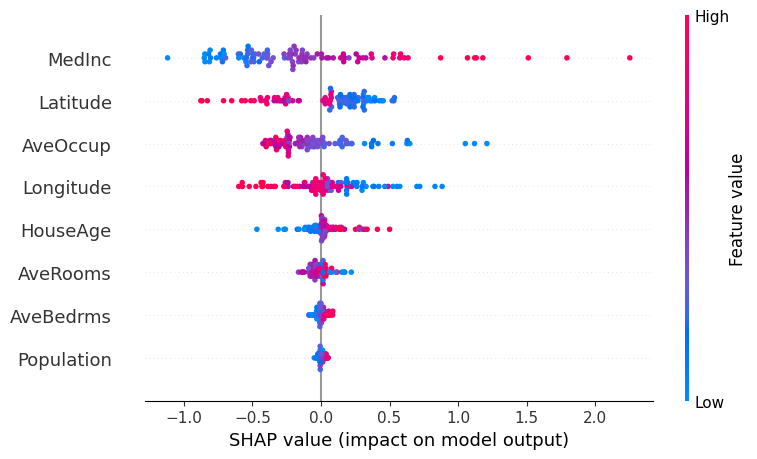

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î∂ÑÌï† (California Housing Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP Í∞í Í≥ÑÏÇ∞
subset_size = 100  # ÏùºÎ∂Ä ÏÉòÌîåÎßå ÏÇ¨Ïö©
X_test_subset = X_test[:subset_size]
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test_subset, check_additivity=False)  # check_additivity=False Ï∂îÍ∞Ä

# üìå Í∞úÎ≥Ñ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
shap.initjs()
shap.plots.force(shap_values[0])  # X_test_subsetÏùò Ï≤´ Î≤àÏß∏ ÏÉòÌîå ÏòàÏ∏° ÏÑ§Î™Ö

# üìå Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï§ëÏöîÌïú Î≥ÄÏàò ÏãúÍ∞ÅÌôî
shap.summary_plot(shap_values, X_test_subset, feature_names=feature_names)

### 4.2 Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ SHAP

In [ ]:
import json
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap

# load pre-trained model and data
model = ResNet50(weights="imagenet")
X, y = shap.datasets.imagenet50()

url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
print("Number of ImageNet classes:", len(class_names))
print("Class names:", class_names)

Number of ImageNet classes: 1000
Class names: ['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl', 'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana', 'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard', 'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon', 'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake', 'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake', 'water_snake', 'vine_snake', 'night_snake', 'boa_constrictor', 'rock_python', 'Indian_cobra', 'green_mamba'

In [ ]:
len("# python function to get model output; replace this function with your own model")

80

In [ ]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)


# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/98 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:13, 13.47s/it]               


In [ ]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)


# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(f, masker_blur, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(X[1:3], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [01:23, 41.72s/it]


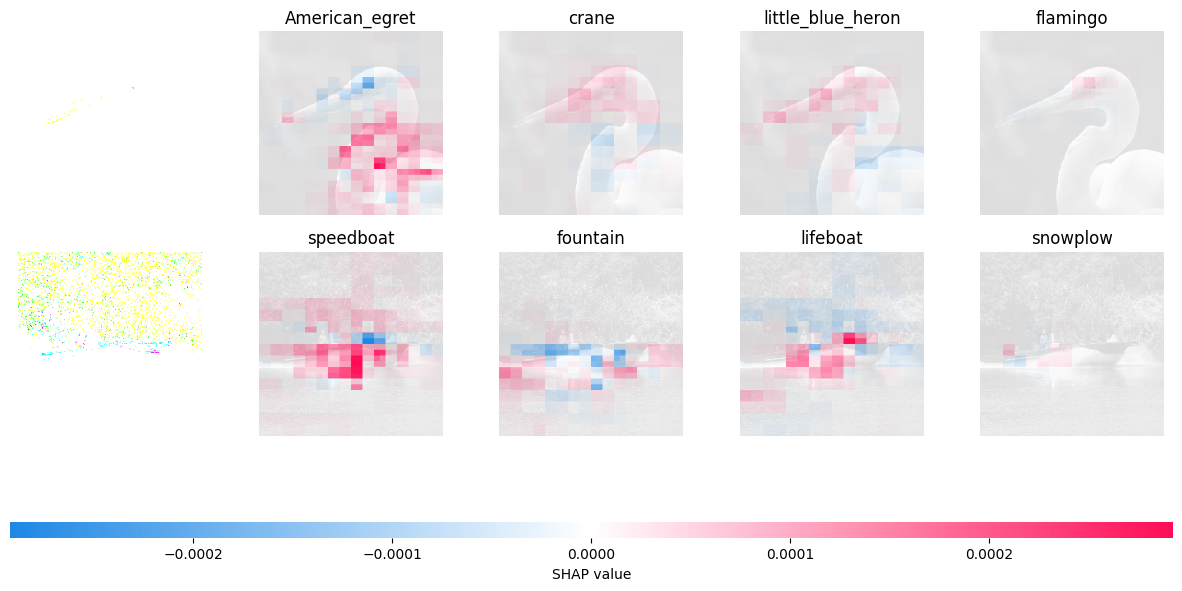

In [ ]:
shap.image_plot(shap_values_fine)
